In [1]:
import pandas as pd
import numpy as np
import io
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from matplotlib import pyplot
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

In [2]:
# Define folders
DATA_FOLDER = f"./data/"
df = pd.read_csv(f'{DATA_FOLDER}/MergedTwitterPrice.csv', index_col='Hour')
# Drop first 30 rows from df - not collecting 1000 tweets per hour at that stage
df = df.iloc[31:]
# drop last row
df = df[:-1]
# Class labels == positive/negative price movements
y = df['Movement']
# Label encoding/binarizing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)
y = y.ravel()
# Drop unnecessary columns/features
cols = ['compound', 'score', 'Compound Change', 'Score Change', 'Compound Movement', 'Score Movement', 'Open', 'Volume', 'Change', 'Movement']
df_reduced = df[cols]
# normalize select features
norm_cols = ['compound', 'score', 'Compound Change', 'Score Change', 'Open', 'Volume', 'Change']
norm = df[norm_cols]
# scale values
scaler = preprocessing.MinMaxScaler()
scaler.fit(norm)
scaled = scaler.transform(norm)
# Round values
scaled = np.round(scaled, 7)
# To dataframe
scaled_df = pd.DataFrame(scaled, columns=norm_cols, index=df.index)
# Replace df cols with normalized cols
df.update(scaled_df)
df_reduced.update(scaled_df)
# select feature columns
X = df.iloc[:, :9]
X_reduced = df.iloc[:, :4]
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.1, random_state=11)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:6599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


# Evaluate Multiple Models - Full features

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier, XGBRFClassifier
import matplotlib.pyplot as plt

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        37
           1       0.51      0.51      0.51        39

    accuracy                           0.50        76
   macro avg       0.50      0.50      0.50        76
weighted avg       0.50      0.50      0.50        76



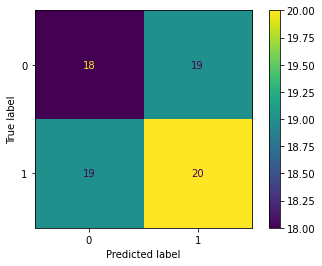

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test, y_pred))

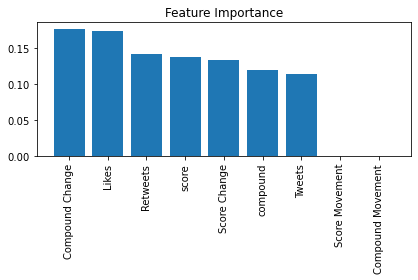

In [5]:
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
# Plot
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), selected_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

RandomForestClassifier(n_estimators=50)
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        37
           1       0.50      0.49      0.49        39

    accuracy                           0.49        76
   macro avg       0.49      0.49      0.49        76
weighted avg       0.49      0.49      0.49        76



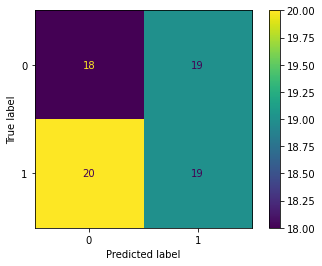

In [6]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test, y_pred))

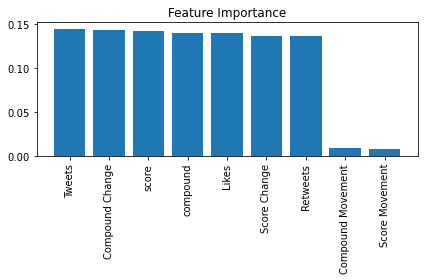

In [7]:
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
# Plot
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), selected_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

ExtraTreesClassifier()
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        37
           1       0.53      0.62      0.57        39

    accuracy                           0.53        76
   macro avg       0.52      0.52      0.52        76
weighted avg       0.52      0.53      0.52        76



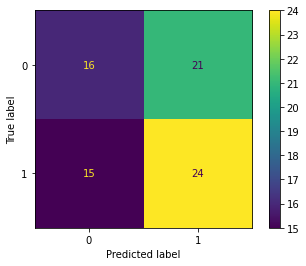

In [8]:
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test, y_pred))

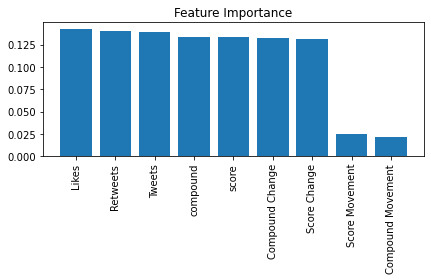

In [9]:
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
# Plot
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), selected_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        37
           1       0.51      0.51      0.51        39

    accuracy                           0.50        76
   macro avg       0.50      0.50      0.50        76
weighted avg       0.50      0.50      0.50        76



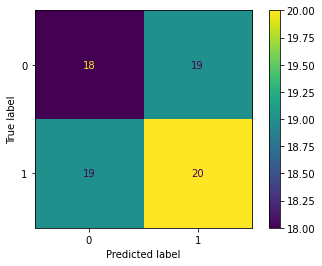

In [10]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test, y_pred))

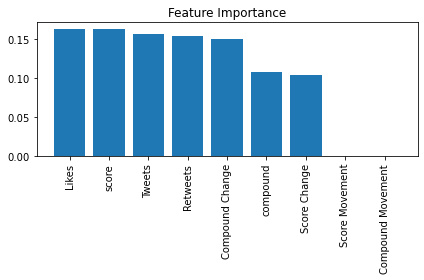

In [11]:
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
# Plot
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), selected_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
              precision    recall  f1-score   support

  

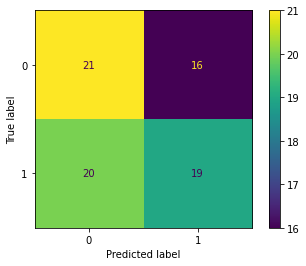

In [12]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test, y_pred))

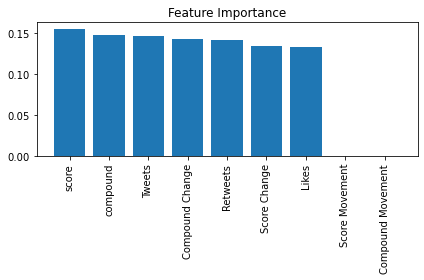

In [13]:
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
# Plot
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), selected_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=2000, n_jobs=4, num_parallel_tree=2000,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, subsample=0.9, tree_method='exact',
                validate_parameters=1, verbosity=None)
              precision    recall  f1-score   support

           0

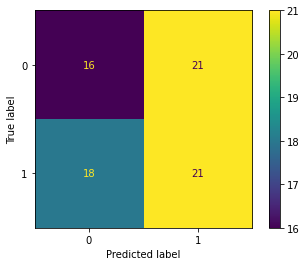

In [14]:
clf = XGBRFClassifier(n_estimators=2000, subsample=0.9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test, y_pred))

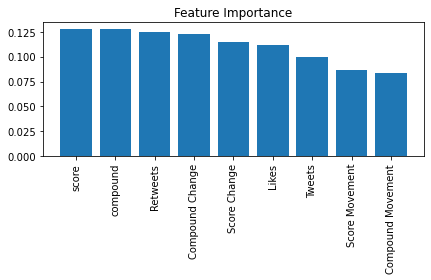

In [15]:
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
# Plot
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), selected_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

## Selected features

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.48      0.43      0.46        37
           1       0.51      0.56      0.54        39

    accuracy                           0.50        76
   macro avg       0.50      0.50      0.50        76
weighted avg       0.50      0.50      0.50        76

[0.24929307 0.22267528 0.24434509 0.28368656]
RandomForestClassifier(n_estimators=50)
              precision    recall  f1-score   support

           0       0.50      0.49      0.49        37
           1       0.53      0.54      0.53        39

    accuracy                           0.51        76
   macro avg       0.51      0.51      0.51        76
weighted avg       0.51      0.51      0.51        76

[0.25403863 0.24702834 0.24321759 0.25571543]
ExtraTreesClassifier()
              precision    recall  f1-score   support

           0       0.46      0.43      0.44        37
           1       0.49      0.51      0.50        39

  

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        37
           1       0.56      0.56      0.56        39

    accuracy                           0.55        76
   macro avg       0.55      0.55      0.55        76
weighted avg       0.55      0.55      0.55        76

[0.25393677 0.25793198 0.22999495 0.25813624]


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=2000, n_jobs=4, num_parallel_tree=2000,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, subsample=0.9, tree_method='exact',
                validate_parameters=1, verbosity=None)
              precision    recall  f1-score   support

           0

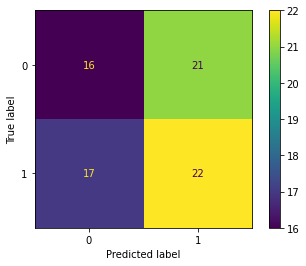

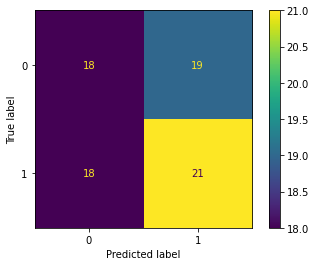

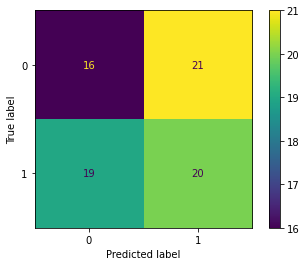

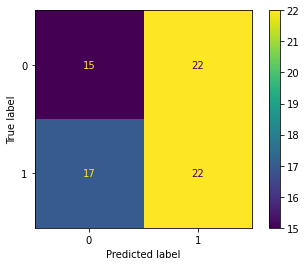

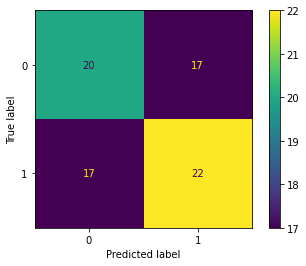

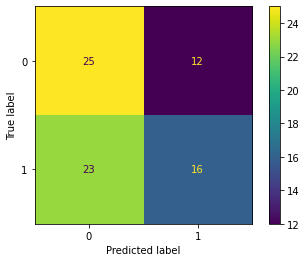

In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train_reduced, y_train_reduced)
y_pred = clf.predict(X_test_reduced)
cm = confusion_matrix(y_test_reduced, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test_reduced, y_pred))
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
print(selected_importances)


clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train_reduced, y_train_reduced)
y_pred = clf.predict(X_test_reduced)
cm = confusion_matrix(y_test_reduced, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test_reduced, y_pred))
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
print(selected_importances)


clf = ExtraTreesClassifier()
clf.fit(X_train_reduced, y_train_reduced)
y_pred = clf.predict(X_test_reduced)
cm = confusion_matrix(y_test_reduced, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test_reduced, y_pred))
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
print(selected_importances)


clf = GradientBoostingClassifier()
clf.fit(X_train_reduced, y_train_reduced)
y_pred = clf.predict(X_test_reduced)
cm = confusion_matrix(y_test_reduced, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test_reduced, y_pred))
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
print(selected_importances)


clf = XGBClassifier()
clf.fit(X_train_reduced, y_train_reduced)
y_pred = clf.predict(X_test_reduced)
cm = confusion_matrix(y_test_reduced, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test_reduced, y_pred))
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
print(selected_importances)


clf = XGBRFClassifier(n_estimators=2000, subsample=0.9)
clf.fit(X_train_reduced, y_train_reduced)
y_pred = clf.predict(X_test_reduced)
cm = confusion_matrix(y_test_reduced, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot()
print(clf)
print(classification_report(y_test_reduced, y_pred))
selected_importances = clf.feature_importances_
sorted_indices = np.argsort(selected_importances)[::-1]
print(selected_importances)




In [21]:
# Train model
model = XGBClassifier()
model.fit(X_train_reduced, y_train, eval_set=[(X_test_reduced, y_test)], early_stopping_rounds=2)
print(model)
print(model.feature_importances_)
# Predict
y_pred = model.predict(X_test_reduced)
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
accuracy

[10:43:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.70651
[1]	validation_0-logloss:0.71934
[2]	validation_0-logloss:0.72108
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.4605263157894737